In [8]:
#1 Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
#2 Рассчитать и визуализировать корреляционную матрицу для переменных
#3 Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis
#4 Визуализировать несколько взаимосвязей между переменными
#5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [49]:
import random
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline  

In [101]:
data=pd.read_csv('auto.csv')
data.head(1)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495


In [19]:
# Задание №1 среднее

horsepower = [i for i in data['horsepower']]

sum_hp = sum(horsepower)
num_hp = len(horsepower)
avg_hp = sum_hp/num_hp
avg_hp

106.04878048780488

In [22]:
# Задание №1 медиана

weight = [i for i in data['curb-weight']]

num_curb = len(weight)
sorted_curb = sorted(weight)
middle = (num_curb // 2) + 0.5
middle=int(middle)
sorted_curb[middle]

2414

In [25]:
# Задание №1 мода

count = {}
for i in weight:
    if i not in counts:
        counts[i] = 1
    else:
        counts[i] += 1

maxp = 0
mode = None
for a, b in counts.items():
    if maxp < b:
        maxp = b
        mode = a
print(mode)

2385


In [16]:
# Задание №1 мин/макс

price = [i for i in data['price']]

min_price = min(price)
max_price = max(price)

print(min_price)
print(max_price)

5118
45400


In [28]:
# Задание №1 среднее отклонение

def stdev(nums):
    diffs = 0
    avg = sum(nums)/len(nums)
    for n in nums:
        diffs += (n - avg)**(2)
    return (diffs/(len(nums)-1))**(0.5)

print(stdev(weight))

520.6802035016389


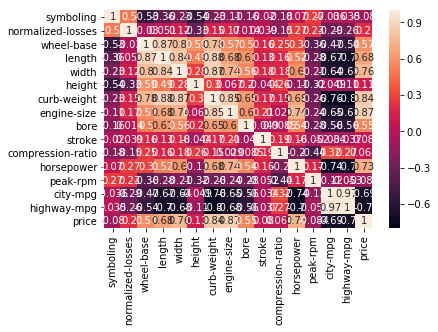

In [31]:
#Задние №2 Рассчитать и визуализировать корреляционную матрицу для переменных

corr = data.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

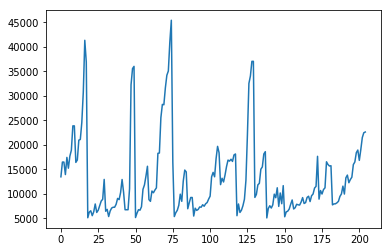

In [44]:
#Задание №3 Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

plt.plot(price)

In [45]:
skew(price)

1.7534486514523662

In [46]:
kurtosis(price)

2.848082544390688

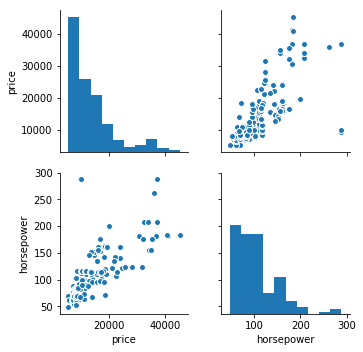

In [52]:
#Задание №4 Визуализировать несколько взаимосвязей между переменными

seaborn.pairplot(data, vars=['price', 'horsepower'],)  

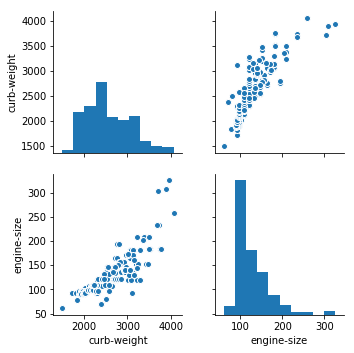

In [54]:
seaborn.pairplot(data, vars=['curb-weight', 'engine-size'],)  

In [99]:
#Задание №5 С использованием t-test статистики проверить взаимосвязи между несколькими переменными

gas = data[data['fuel-type'] == 'gas']['price']
disel = data[data['fuel-type'] == 'diesel']['price']

stats.ttest_ind(gas, disel) 

Ttest_indResult(statistic=-1.4715061487687495, pvalue=0.1427027883743746)

In [75]:
stats.ttest_1samp(data['price'], 13270)

Ttest_1sampResult(statistic=0.07547641413445415, pvalue=0.9399096271221693)

In [96]:
stats.ttest_ind(data['price'], data['engine-size'])

Ttest_indResult(statistic=23.30023364531501, pvalue=5.653799932442315e-77)